In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv('/home/kylemeador/designs/2_ComponentDesignPoseMetrics(NO_T32).csv', index_col=[0], header=[0,1,2])

In [5]:
df.mean()

pose  dock  component_1_number_of_residues      161.133333
            component_2_number_of_residues      159.987879
            design_dimension                      0.000000
            interface_b_factor_per_res           20.000000
            multiple_fragment_ratio               2.075160
            nanohedra_score                      13.501517
            nanohedra_score_central               4.736972
            nanohedra_score_per_res               0.478413
            number_fragment_residues_central      7.703030
            number_fragment_residues_total       24.418182
            percent_fragment_coil                 0.022606
            percent_fragment_helix                0.877074
            percent_fragment_strand               0.021532
            percent_residues_fragment_all         0.763848
            percent_residues_fragment_center      0.240979
            total_interface_residues             32.357576
            unique_fragments                     10.8303

In [11]:
# df = df.T

In [40]:
display(df.shape)
print('Cleaning df of Nan')
clean_na_df = df.dropna()
# clean_na_df = clean_na_df.apply(pd.to_numeric)
display(clean_na_df.shape)

(165, 19)

Cleaning df of Nan


(165, 19)

In [41]:
for column in clean_na_df.columns:
    if column[2] in ['component_1_symmetry', 'component_2_symmetry']:  # 'fragment_cluster_ids':
        continue
    print(column)
    clean_na_df[column] = clean_na_df[column].astype(float)

('pose', 'dock', 'component_1_number_of_residues')
('pose', 'dock', 'component_2_number_of_residues')
('pose', 'dock', 'design_dimension')
('pose', 'dock', 'interface_b_factor_per_res')
('pose', 'dock', 'multiple_fragment_ratio')
('pose', 'dock', 'nanohedra_score')
('pose', 'dock', 'nanohedra_score_central')
('pose', 'dock', 'nanohedra_score_per_res')
('pose', 'dock', 'number_fragment_residues_central')
('pose', 'dock', 'number_fragment_residues_total')
('pose', 'dock', 'percent_fragment_coil')
('pose', 'dock', 'percent_fragment_helix')
('pose', 'dock', 'percent_fragment_strand')
('pose', 'dock', 'percent_residues_fragment_all')
('pose', 'dock', 'percent_residues_fragment_center')
('pose', 'dock', 'total_interface_residues')
('pose', 'dock', 'unique_fragments')


In [42]:
clean_na_df.dtypes

pose  dock  component_1_number_of_residues      float64
            component_1_symmetry                 object
            component_2_number_of_residues      float64
            component_2_symmetry                 object
            design_dimension                    float64
            interface_b_factor_per_res          float64
            multiple_fragment_ratio             float64
            nanohedra_score                     float64
            nanohedra_score_central             float64
            nanohedra_score_per_res             float64
            number_fragment_residues_central    float64
            number_fragment_residues_total      float64
            percent_fragment_coil               float64
            percent_fragment_helix              float64
            percent_fragment_strand             float64
            percent_residues_fragment_all       float64
            percent_residues_fragment_center    float64
            total_interface_residues            

In [43]:
def get_rpx_status(design):
#     entry_d = {'I': {('C2', 'C3'): 8, ('C2', 'C5'): 14, ('C3', 'C5'): 56}, 'T': {('C2', 'C3'): 4, ('C3', 'C3'): 52}}
#     design_sym = design[:1]
#     design_components = design[1:3]
#     entry = entry_d[design_sym][('C%s' % design_components[1], 'C%s' % design_components[0])]
    if design[-6:-3] in ['I32', 'I52']:
        return 1
    else:
        return 0

In [44]:
status = [get_rpx_status(design) for design in clean_na_df.index]

In [45]:
# clean_na_df.index[0][-5:-3]
clean_na_df[('pose', 'info', 'rpx')] = status

In [56]:
success_index = ['I32-06','I32-10','I32-19','I32-28','I52-03','I52-32','I52-33','I53-34','I53-40','I53-50','I53-50','T32-28','T33-09','T33-15'
'T33-21','T33-28','T33-31']

success = []
for design in clean_na_df.index:
#     print(design[-6:])
#     if design[-6:] = 
    if design[-6:] in success_index:
        print(design)
        success.append(1)
    else:
        success.append(0)
        
clean_na_df[('pose', 'info', 'status')] = success
# clean_na_df[]

1nza_1ufy-DEGEN_0_0-ROT_0_0-T33-09
3fuy_3fwu-DEGEN_0_0-ROT_0_0-T33-28
2vvp_2c5q-DEGEN_0_0-ROT_0_0-I32-19
3e7d_1mww-DEGEN_0_0-ROT_0_0-I32-06
3nqn_2zhz-DEGEN_0_0-ROT_0_0-I32-28
3bxo_1c41-DEGEN_0_0-ROT_0_0-I52-03
3lfh_2jfb-DEGEN_0_0-ROT_0_0-I52-32
1wa3_2obx-DEGEN_0_0-ROT_0_0-I53-50
2yw3_2b98-DEGEN_0_0-ROT_0_0-I53-34
4e38_2b98-DEGEN_0_0-ROT_0_0-I53-40


In [29]:
# clean_na_df[clean_na_df[('pose', 'info', 'status')] == 1]

Empty DataFrame
Columns: [(pose, dock, component_1_number_of_residues), (pose, dock, component_1_symmetry), (pose, dock, component_2_number_of_residues), (pose, dock, component_2_symmetry), (pose, dock, design_dimension), (pose, dock, interface_b_factor_per_res), (pose, dock, multiple_fragment_ratio), (pose, dock, nanohedra_score), (pose, dock, nanohedra_score_central), (pose, dock, nanohedra_score_per_res), (pose, dock, number_fragment_residues_central), (pose, dock, number_fragment_residues_total), (pose, dock, percent_fragment_coil), (pose, dock, percent_fragment_helix), (pose, dock, percent_fragment_strand), (pose, dock, percent_residues_fragment_all), (pose, dock, percent_residues_fragment_center), (pose, dock, total_interface_residues), (pose, dock, unique_fragments), (pose, info, rpx), (pose, info, status)]
Index: []

[0 rows x 21 columns]

In [57]:
plot_df = clean_na_df.droplevel(0, axis=1).droplevel(0, axis=1)
plot_df

,component_1_number_of_residues,component_1_symmetry,component_2_number_of_residues,component_2_symmetry,design_dimension,interface_b_factor_per_res,multiple_fragment_ratio,nanohedra_score,nanohedra_score_central,nanohedra_score_per_res,...,number_fragment_residues_total,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_residues_fragment_all,percent_residues_fragment_center,total_interface_residues,unique_fragments,rpx,status
1byr_3l8r-DEGEN_0_0-ROT_0_0-I32-44,152.0,C2,102.0,C3,0.0,20.0,1.000000,12.017804,2.525796,0.315724,...,35.0,0.125000,0.875000,0.0,1.093750,0.250000,32.0,4.0,1,0
1j7g_1woz-DEGEN_0_0-ROT_0_0-I32-62,144.0,C2,159.0,C3,0.0,20.0,4.000000,26.929445,13.263044,1.020234,...,28.0,0.000000,1.000000,0.0,0.875000,0.406250,32.0,26.0,1,0
1j7g_1woz-DEGEN_0_0-ROT_0_0-I32-63,144.0,C2,159.0,C3,0.0,20.0,4.363636,21.176372,8.865812,0.805983,...,27.0,0.000000,1.000000,0.0,1.038462,0.423077,26.0,24.0,1,0
1mk4_3n79-DEGEN_0_0-ROT_0_0-I32-52,156.0,C2,183.0,C3,0.0,20.0,4.250000,31.325394,14.661015,0.916313,...,35.0,0.000000,1.000000,0.0,1.206897,0.551724,29.0,34.0,1,0
1rkt_3otm-DEGEN_0_0-ROT_0_0-I32-55,200.0,C2,205.0,C3,0.0,20.0,4.285714,23.872240,10.699937,0.764281,...,32.0,0.000000,1.000000,0.0,0.941176,0.411765,34.0,30.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3bxo_1c41-DEGEN_0_0-ROT_0_0-I52-03,236.0,C2,165.0,C5,0.0,20.0,1.200000,5.443688,1.546784,0.309357,...,18.0,0.333333,0.666667,0.0,0.545455,0.151515,33.0,3.0,1,1
3lfh_2jfb-DEGEN_0_0-ROT_0_0-I52-32,129.0,C2,153.0,C5,0.0,20.0,1.200000,6.182394,1.717144,0.343429,...,18.0,0.000000,1.000000,0.0,0.580645,0.161290,31.0,3.0,1,1
1wa3_2obx-DEGEN_0_0-ROT_0_0-I53-50,201.0,C3,146.0,C5,0.0,20.0,1.000000,2.471307,0.494261,0.247131,...,10.0,0.000000,1.000000,0.0,0.303030,0.060606,33.0,1.0,0,1
2yw3_2b98-DEGEN_0_0-ROT_0_0-I53-34,195.0,C3,140.0,C5,0.0,20.0,1.333333,10.071361,2.108523,0.351421,...,26.0,0.000000,1.000000,0.0,0.866667,0.200000,30.0,4.0,0,1


0.07711252049109468

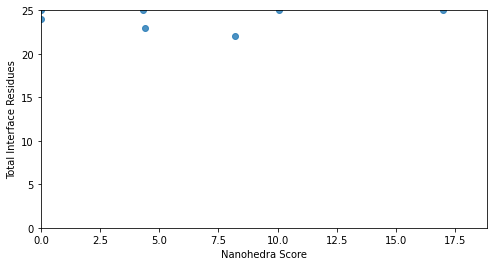

0.8814005390459307

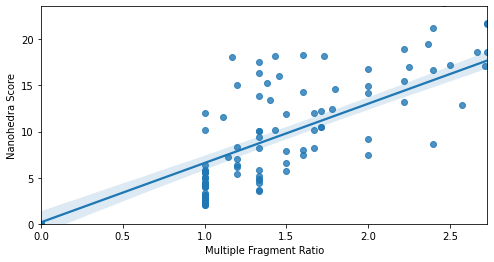

KeyError: 'interface_area'

In [59]:
data_pairs = [('nanohedra_score', 'total_interface_residues'), # ('nanohedra_score_central', 'nanohedra_score'), <-- 0.97 correlation
              # ('nanohedra_score_central', 'interface_area'), # ('nanohedra_score', 'interface_area'),
              ('multiple_fragment_ratio', 'nanohedra_score'), # ('nanohedra_score', 'number_fragment_residues_central'),
              ('multiple_fragment_ratio', 'interface_area')]
# for x, y in data_pairs:
#     ax = sns.displot(data=plot_df, x=x, y=y, palette='colorblind', kind='kde', rug=True, linewidth = 3)  # hue='protocol', legend=False, kde=True, multiple="stack")
#     ax.set(xlabel=' '.join(x.split('_')).title(), ylabel=' '.join(y.split('_')).title())
# ay = sns.displot(data=df, x='Predicted Binding Energy', hue='protocol', palette='colorblind', kind='kde', linewidth = 3)  # kde=True, multiple="stack")
# ay.set(ylabel='Frequency')

for x, y in data_pairs:
    display(plot_df[x].corr(plot_df[y]))
    f, axs = plt.subplots(1, 1, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4]))
    y_values = plot_df[y].values
    x_values = plot_df[x].values
    ax = sns.regplot(x=x, y=y, data=plot_df, ax=axs) 
    ax.set_ylim(0, np.max(y_values)*0.5)  # showfliers=False)
    ax.set_xlim(0, np.max(x_values)*0.4)
#     if y == 'int_energy_res_summary_delta':
#         y = 'predicted_binding_energy'
#     if x == 'protocol_energy_distance_sum':
#         x = 'protocol_distance'
    ax.set(xlabel=' '.join(x.split('_')).title(), ylabel=' '.join(y.split('_')).title())
#     f.add_subplot(ax)
    plt.show()

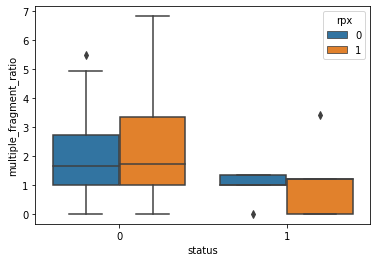

In [69]:
ax = sns.boxplot(x="status", y="multiple_fragment_ratio", hue="rpx", data=plot_df)  